In [16]:
import pandas as pd
import numpy as np
from Bio import Phylo
import matplotlib
import matplotlib.pyplot as plt

In [17]:
#Gmax reference file
Gmax      = open('./Gmax/Wm82.a4.v1/assembly/Gmax_508_v4.0.fa')
Gmax_read = Gmax.read()    

In [18]:
Gmax_read[0:500]

'>Gm01\nGGTTTGGTGTTTGGGTTTTAGGTTTTAGGTTTTAGGTTTTACGGTTTAGGGTTTATGGTTTATGGTTTAGGGTTTAGGGT\nTAGGAAATAATTTGGGTCTTTCATCTTTCAACAAAAAATTAAGGGATTTAGAGTAATTTTTAGGGTTTAGGGTTTAAGGT\nTTTAGGTTTCGGGTTTGGGTTTTAGATTTTACGGCTTACGGTTTAAAGTTTAGGGGTTAGGGTTTAGGGTTTAGAAATAA\nATTTGAGTGTTTGACATTTGAACACAAAATTAAGGCATTTAGAGTCATTTTTAGGGTTTACGGTTTAGGGTTTAGCAAGA\nAATTTCGGTGTTTCATCTTCGAACACAAAATTAAGGCAGTTAAAGTCTTTTTTTGGGTTTAGGGTTTAGGGTTATTTGCC\nTGGGTGTGCCAGTGGCGTGAGCAAATGGAGGGCGGCCATTTCTCATGTTTGGACGTCAAAGAACCCATAAAAAATAGTCC\nTGTTCCCC'

In [19]:
#ref dic 만들기 {id : seq}
ref_dic = {}

for i in Gmax_read.split('>')[1:] :
    key          = i.split('\n')[0]
    value        = ''.join(i.split('\n')[1:])
    ref_dic[key] = value

In [20]:
#gff file에서 CDS만 고르기
df        = pd.read_csv('./Gmax/Wm82.a4.v1/annotation/Gmax_508_Wm82.a4.v1.gene.gff3', sep='\t', comment = '#', header = None)
m_df      = df[2] == 'CDS'
Gmax_CDS  = df[m_df]

In [11]:
df.head()

,0,1,2,3,4,5,6,7,8
0,Gm01,phytozomev13,gene,27344,28430,.,-,.,ID=Glyma.01G000100.Wm82.a4.v1;Name=Glyma.01G00...
1,Gm01,phytozomev13,mRNA,27344,28430,.,-,.,ID=Glyma.01G000100.1.Wm82.a4.v1;Name=Glyma.01G...
2,Gm01,phytozomev13,CDS,28139,28218,.,-,0,ID=Glyma.01G000100.1.Wm82.a4.v1.CDS.1;Parent=G...
3,Gm01,phytozomev13,five_prime_UTR,28219,28430,.,-,.,ID=Glyma.01G000100.1.Wm82.a4.v1.five_prime_UTR...
4,Gm01,phytozomev13,CDS,27926,27991,.,-,1,ID=Glyma.01G000100.1.Wm82.a4.v1.CDS.2;Parent=G...


In [12]:
Gmax_CDS.head()

,0,1,2,3,4,5,6,7,8
2,Gm01,phytozomev13,CDS,28139,28218,.,-,0,ID=Glyma.01G000100.1.Wm82.a4.v1.CDS.1;Parent=G...
4,Gm01,phytozomev13,CDS,27926,27991,.,-,1,ID=Glyma.01G000100.1.Wm82.a4.v1.CDS.2;Parent=G...
6,Gm01,phytozomev13,CDS,27656,27824,.,-,1,ID=Glyma.01G000100.1.Wm82.a4.v1.CDS.3;Parent=G...
9,Gm01,phytozomev13,CDS,52485,52601,.,-,0,ID=Glyma.01G000137.1.Wm82.a4.v1.CDS.1;Parent=G...
12,Gm01,phytozomev13,CDS,55026,55224,.,-,0,ID=Glyma.01G000174.1.Wm82.a4.v1.CDS.1;Parent=G...


In [6]:
ref_dic.keys()

dict_keys(['scaffold_51', 'scaffold_570', 'scaffold_127', 'scaffold_560', 'scaffold_234', 'Gm01', 'scaffold_78', 'scaffold_65', 'Gm13', 'scaffold_355', 'scaffold_55', 'Gm10_scaffold_1052', 'scaffold_233', 'scaffold_42', 'scaffold_149', 'scaffold_125', 'scaffold_207', 'Gm03', 'scaffold_74', 'Gm06_scaffold_59', 'scaffold_89', 'scaffold_33', 'scaffold_187', 'scaffold_336', 'scaffold_352', 'scaffold_28', 'Gm03_scaffold_27', 'Gm06_scaffold_214', 'scaffold_226', 'Gm03_scaffold_238', 'scaffold_452', 'scaffold_502', 'scaffold_180', 'scaffold_24', 'scaffold_542', 'Gm17', 'Gm05_scaffold_79', 'scaffold_132', 'Gm16', 'scaffold_576', 'scaffold_298', 'scaffold_216', 'Gm06_scaffold_70', 'scaffold_486', 'scaffold_134', 'scaffold_367', 'scaffold_143', 'scaffold_82', 'scaffold_556', 'Gm19_scaffold_94', 'scaffold_118', 'scaffold_64', 'scaffold_147', 'Gm11_scaffold_116', 'scaffold_43', 'scaffold_152', 'scaffold_95', 'scaffold_26', 'Gm02_scaffold_122', 'Gm06_scaffold_1454', 'scaffold_76', 'scaffold_29', 's

In [21]:
#start-end 서열을 ref_dic에서 찾아 dataframe에 추가하기
#start는 -1 해줘야함
Gmax_CDS['seq'] = Gmax_CDS.apply(lambda x : ref_dic[x[0]][x[3]-1:x[4]],axis=1)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
Gmax_CDS.head()

,0,1,2,3,4,5,6,7,8,seq
2,Gm01,phytozomev13,CDS,28139,28218,.,-,0,ID=Glyma.01G000100.1.Wm82.a4.v1.CDS.1;Parent=G...,CTGTGGAAATTGGCATTGGCATTAATGGAACTCTCAATCTCAACCA...
4,Gm01,phytozomev13,CDS,27926,27991,.,-,1,ID=Glyma.01G000100.1.Wm82.a4.v1.CDS.2;Parent=G...,CTATATTTAGAACACTGTATTTCACGGATTTTGTATAAATAGAACT...
6,Gm01,phytozomev13,CDS,27656,27824,.,-,1,ID=Glyma.01G000100.1.Wm82.a4.v1.CDS.3;Parent=G...,TTAATGTAAAGCAAGATACAAGACATGATATAACATGAAACTGATA...
9,Gm01,phytozomev13,CDS,52485,52601,.,-,0,ID=Glyma.01G000137.1.Wm82.a4.v1.CDS.1;Parent=G...,TTAACAGGAGTCATGAAACACTTTGATAGCATATAGACCAACTACA...
12,Gm01,phytozomev13,CDS,55026,55224,.,-,0,ID=Glyma.01G000174.1.Wm82.a4.v1.CDS.1;Parent=G...,CATCATCTCTCTCTTGCTTCTTCTGCTTTTCCTTTGGTGTGGACTT...


In [8]:
#CDS dic 만들기 {id : CDS}
#minus strand는 역상보적
CDS_minus = Gmax_CDS[Gmax_CDS[6] == '-']
CDS_plus  = Gmax_CDS[Gmax_CDS[6] == '+']

comp_dic = {'A':'T', 'T':'A', 'C':'G', 'G':'C', 'N':'N'}

CDS_dic   = {}
for i in CDS_minus.values[0:]:
    key   = i[8].split('.')[1]
    value = ''.join([comp_dic[x] for x in i[9]])[::-1]
    try :
        CDS_dic[key] += value
    except KeyError :
        CDS_dic[key] = value

for i in CDS_plus.values[0:]:
    key   = i[8].split('.')[1]
    value = i[9]
    try :
        CDS_dic[key] += value
    except KeyError :
        CDS_dic[key] = value

In [9]:
#prank로 translation
#alignment 없이 translation   : prank -d=Gmax_CDS.fasta -o=Gmax -translate -convert -F
#alignment까지 한 translation : prank -d=Gmax_CDS.fasta -o=Gmax -translate -F


#nucleotide -> amino acid
gencode = {
    'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
    'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
    'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
    'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
    'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
    'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
    'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
    'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
    'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
    'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
    'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
    'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
    'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
    'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
    'TAC':'Y', 'TAT':'Y', 'TAA':'*', 'TAG':'*',
    'TGC':'C', 'TGT':'C', 'TGA':'*', 'TGG':'W'}

In [10]:
#translation 함수만들고 aa dic 만들기 {id : protein}
Gmax_aa_dic = {}
def translation(seq_dic,aa_dic):
    for x in seq_dic:
        aa = ''
        seq = seq_dic[x]
        for i in range(int(len(seq)/3)):
            try :
                aa += gencode[seq[i*3:(i+1)*3].upper()]
            except KeyError :
                aa += 'N'
        aa_dic[x] = aa
        
translation(CDS_dic,Gmax_aa_dic)

In [11]:
#Boleraceacapitata도 똑같이 하기
ref_Bol  = open('./Boleraceacapitata/v1.0/assembly/Boleraceacapitata_446_v1.0.fa')
Bol_read = ref_Bol.read()

ref_dic_Bol = {}

for x in Bol_read.split('>')[1:]:
    key              = x.split('\n')[0].split(' ')[0]
    value            = ''.join(x.split('\n')[1:])
    ref_dic_Bol[key] = value

In [12]:
df_Bol   = pd.read_csv('./Boleraceacapitata/v1.0/annotation/Boleraceacapitata_446_v1.0.gene.gff3', comment = '#', sep = '\t', header = None)
m_Bol    = df_Bol[2] == 'CDS'
Bol_CDS  = df_Bol[m_Bol]
Bol_CDS['seq'] = Bol_CDS.apply(lambda x : ref_dic_Bol[x[0]][x[3]-1:x[4]],axis=1)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [13]:
Bol_CDS_minus = Bol_CDS[Bol_CDS[6] == '-']
Bol_CDS_plus  = Bol_CDS[Bol_CDS[6] == '+']

Bol_CDS_dic= {}

for x in Bol_CDS_minus.values[0:]:       
    key   = x[8].split('=')[1].split('.')[0]
    value = ''.join([comp_dic[i] for i in x[9]])[::-1]
    try :
        Bol_CDS_dic[key] += value
    except KeyError :
        Bol_CDS_dic[key] = value

for x in Bol_CDS_plus.values[0:]:
    key   = x[8].split('=')[1].split('.')[0]
    value = x[9]
    try :
        Bol_CDS_dic[key] += value
    except KeyError :
        Bol_CDS_dic[key] = value
        
Bol_aa_dic = {}
translation(Bol_CDS_dic,Bol_aa_dic)

In [14]:
#fasta file 만들기
def make_fasta(file_name,dic):
    ofile = open(file_name, 'w')
    for i in dic.keys():
        ofile.write('>' + i + '\n' + dic[i] + '\n')
    ofile.close
    
make_fasta('Boleraceacapitata.fa',Bol_aa_dic)
make_fasta('Gmax.fa',Gmax_aa_dic)

In [59]:
#command에서 blast돌려서 table 만들기

# >sudo apt-get update
# >sudo apt-get -y install python ncbi-blast+

# >grep -c '^>' file_name.fa : sequence 얼마나 있는가
    
# >makeblastdb -in file_name.fa -dbtype prot
#    error 뜨면
#    >grep -c "^$" ./file_name.fa
#    >awk 'BEGIN {RS = ">" ; FS = "\n" ; ORS = ""} $2 {print ">"$0}' ./file_name.fa >./file_name.fasta

# >blastp -query file_name.fasta -db file_name2.fasta : command에 바로 보여줌

# >blastp -query file_name.fasta -db file_name2.fasta -out 1_vs_2_blast_results.txt : txt 파일 생성

# >less 1_vs_2_blast_results.txt : less 사용해서 결과 확인
    
# >blastp -query file_name.fasta -db file_name2.fasta -out 2_vs_1_blast_results.tab -evalue 1e-5 -outfmt 7 : outfmt 7로 저장


# ex) query는 Gmax, subject는 Bol

In [23]:
#table
df_blast = pd.read_csv('./Gmax_vs_Bol_Blast_results.tab',comment='#', sep = '\t',header= None)
df_blast.columns = ['query id','subject id','% ident','alignment length','mismatch','gap open','q.start','q.end','s.start','s.end','evalue','bit score']

In [25]:
df_blast.head()

,query id,subject id,% ident,alignment length,mismatch,gap open,q.start,q.end,s.start,s.end,evalue,bit score
0,06G097300,Bol037325,36.56,424,238,9,17,437,17,412,6.000000e-87,275.0
1,06G097300,Bol017901,24.61,451,278,17,19,437,21,441,4.000000e-20,92.4
2,06G097300,Bol012512,24.04,366,234,8,80,412,1,355,1.000000e-16,81.3
3,06G097300,Bol038758,22.31,399,270,14,38,412,18,400,4.000000e-15,76.6
4,06G097300,Bol037414,27.14,269,172,10,21,277,15,271,2.000000e-14,74.7


In [24]:
#identity 높은것만 골라내기
h                  = np.percentile(df_blast['% ident'], 99.9)
df_blast_h         = df_blast[df_blast['% ident'] > h]
df_blast_h.columns = df_blast.columns

In [62]:
#fasta file 만들기 (query 1개 vs subject 여러개)
for i in set(df_blast_h['query id']):
    blast_dic = {}
    key = []
    key.append(i)
    m = df_blast_h['query id'] == i
    for x in df_blast_h[m]['subject id']:
        key.append(x)
    for c in key :
        try :
            value = Gmax_aa_dic[c]
        except KeyError :
            value = Bol_aa_dic[c]
        blast_dic[c] = value
    #make_fasta('./fasta_g/Gmax_Bol_%s.fasta'%i,blast_dic)

In [ ]:
#alignment - clustalw

# >clustalw
# 1. Sequence Input From Disc : fasta file input
# 2. Multiple Alignments
#    -1. Do complete multiple alignment now Slow/Accurate : .aln , .dnd 생성

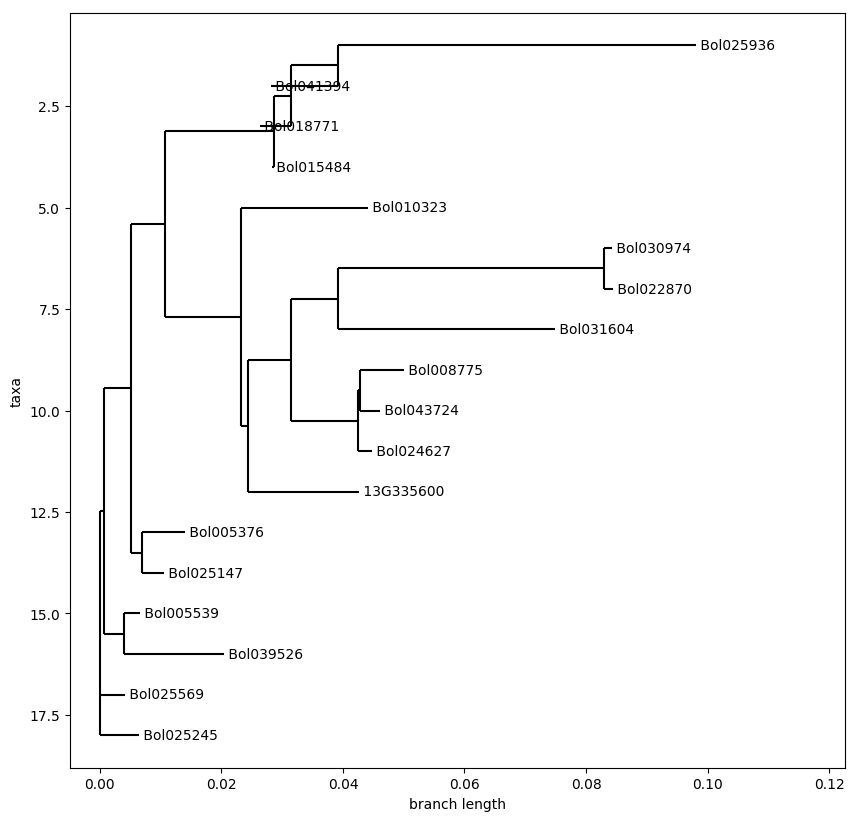

In [26]:
#tree 그리기 : https://biopython.org/wiki/Phylo
tree = Phylo.read('./Gmax_Bol_13G335600.dnd', 'newick')
matplotlib.rc('font', size = 10)
fig  = plt.figure(figsize = (10,10), dpi = 100)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(tree, axes = axes)

In [27]:
#gene간의 sequence 비교
o = open('./Gmax_Bol_13G335600.aln')
r = o.read()

In [28]:
r.split('\n')[4].split('       ')[1]

'MADGEDIQPLVCDNGTGMVKAGFAGDDAPRAVFPSIVGRPRHTGVMVGMGQKDAYVGDEA'

In [29]:
aln_dic_c = {}
for i in r.split('\n')[3:]:
    key = i.split('       ')[0]
    value = [ii for ii in i.split('       ')[1:]]
    try :
        aln_dic_c[key] += value
    except KeyError :
        aln_dic_c[key] = value

In [30]:
del aln_dic_c['']

In [31]:
aln_dic_c

{'13G335600': ['MADTEDIQPLVCDNGTGMVKAGFAGDDAPRAVFPSIVGRPRHTGVMVGMGQKDAYVGDEA',
  'QSKRGILTLKYPIEHGIVSNWDDMEKIWHHTFYNELRVAPEEHPVLLTEAPLNPKANREK',
  'MTQIMFETFNTPAMYVAIQAVLSLYASGRTTGIVLDSGDGVSHTVPIYEGYALPHAILRL',
  'DLAGRDLTDALMKILTERGYSFTTTAEREIVRDMKEKLAYLALDYEQELETSKTSSAVEK',
  'SYELPDGQVITIGAERFRCPEVLFQPSMIGMEAVGIHETTYNSIMKCDVDIRKDLYGNIV',
  'LSGGSTMFPGIADRMSKEITALAPSSMKIKVVAPPERKYSVWIGGSILASLSTFQQMWIA',
  'KAEYDESGPSIVHRKCFMADTEDIQPLVCDNGTGMVKAGFAGDDAPRAVFPSIVGRPRHT',
  'GVMVGMGQKDAYVGDEAQSKRGILTLKYPIEHGIVSNWDDMEKIWHHTFYNELRVAPEEH',
  'PVLLTEAPLNPKANREKMTQIMFETFNTPAMYVAIQAVLSLYASGRTTGIVLDSGDGVSH',
  'TVPIYEGYALPHAILRLDLAGRDLTDALMKILTERGYSFTTTAEREIVRDMKEKLAYLAL',
  'DYEQELETSKTSSAVEKSYELPDGQVITIGAERFRCPEVLFQPSMIGMEAVGIHETTYNS',
  'IMKCDVDIRKDLYGNIVLSGGSTMFPGIADRMSKEITALAPSSMKIKVVAPPERKYSVWI',
  'GGSILASLSTFQQMWIAKAEYDESGPSIVHRKCFMADTEDIQPLVCDNGTGMVKAGFAGD',
  'DAPRAVFPSIVGRPRHTGVMVGMGQKDAYVGDEAQSKRGILTLKYPIEHGIVSNWDDMEK',
  'IWHHTFYNELRVAPEEHPVLLTEAPLNPKANREKMTQIMFETFNTPAMYVAIQAVLSLYA

In [32]:
aln_dic = {}
for i in aln_dic_c.keys():
    key = i
    value = ''.join(aln_dic_c[i])
    aln_dic[key] = value

In [33]:
aln_dic

{'13G335600': 'MADTEDIQPLVCDNGTGMVKAGFAGDDAPRAVFPSIVGRPRHTGVMVGMGQKDAYVGDEAQSKRGILTLKYPIEHGIVSNWDDMEKIWHHTFYNELRVAPEEHPVLLTEAPLNPKANREKMTQIMFETFNTPAMYVAIQAVLSLYASGRTTGIVLDSGDGVSHTVPIYEGYALPHAILRLDLAGRDLTDALMKILTERGYSFTTTAEREIVRDMKEKLAYLALDYEQELETSKTSSAVEKSYELPDGQVITIGAERFRCPEVLFQPSMIGMEAVGIHETTYNSIMKCDVDIRKDLYGNIVLSGGSTMFPGIADRMSKEITALAPSSMKIKVVAPPERKYSVWIGGSILASLSTFQQMWIAKAEYDESGPSIVHRKCFMADTEDIQPLVCDNGTGMVKAGFAGDDAPRAVFPSIVGRPRHTGVMVGMGQKDAYVGDEAQSKRGILTLKYPIEHGIVSNWDDMEKIWHHTFYNELRVAPEEHPVLLTEAPLNPKANREKMTQIMFETFNTPAMYVAIQAVLSLYASGRTTGIVLDSGDGVSHTVPIYEGYALPHAILRLDLAGRDLTDALMKILTERGYSFTTTAEREIVRDMKEKLAYLALDYEQELETSKTSSAVEKSYELPDGQVITIGAERFRCPEVLFQPSMIGMEAVGIHETTYNSIMKCDVDIRKDLYGNIVLSGGSTMFPGIADRMSKEITALAPSSMKIKVVAPPERKYSVWIGGSILASLSTFQQMWIAKAEYDESGPSIVHRKCFMADTEDIQPLVCDNGTGMVKAGFAGDDAPRAVFPSIVGRPRHTGVMVGMGQKDAYVGDEAQSKRGILTLKYPIEHGIVSNWDDMEKIWHHTFYNELRVAPEEHPVLLTEAPLNPKANREKMTQIMFETFNTPAMYVAIQAVLSLYASGRTTGIVLDSGDGVSHTVPIYEGYALPHAILRLDLAGRDLTDALMKILTERGYSFTTTAEREIVRDMKEKLAYLALDYEQELET

In [34]:
#gene간의 다른 서열 개수 구하기
seq1 = aln_dic[input('seq 1 :')]
seq2 = aln_dic[input('seq 2 :')]
seq3 = aln_dic[input('seq 3 :')]

score_1_vs_2 = sum([1 for a, b in zip(seq1, seq2) if a != b])
score_1_vs_3 = sum([1 for a, b in zip(seq1, seq3) if a != b])
score_2_vs_3 = sum([1 for a, b in zip(seq2, seq3) if a != b])

print('score_1_vs_2 :',score_1_vs_2)
print('score_1_vs_3 :',score_1_vs_3)
print('score_2_vs_3 :',score_2_vs_3)


seq 1 : Bol030974
seq 2 : Bol022870
seq 3 : Bol025245


score_1_vs_2 : 1
score_1_vs_3 : 34
score_2_vs_3 : 34


In [167]:
len(aln_dic['Bol025245'])

1131

### Prank

In [ ]:
#sudo apt-get update
#sudo apt-get install prank

In [168]:
# ex) > prank -d=./fasta_g/Gmax_Bol_13G335600.fasta -showtree -o=Gmax_Bol_13G335600_prank
# : fasta -> .dnd & .aln

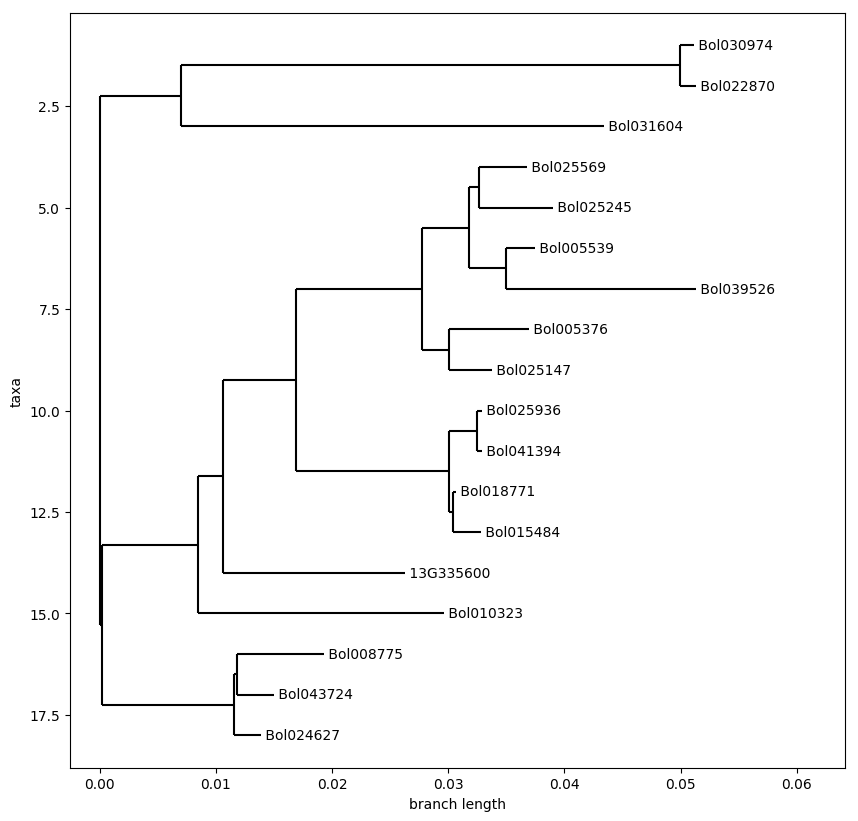

In [42]:
tree_p = Phylo.read('./Gmax_Bol_13G335600_prank.best.dnd', 'newick')
matplotlib.rc('font', size = 10)
fig  = plt.figure(figsize = (10,10), dpi = 100)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(tree_p, axes = axes)

In [43]:
#gene간의 sequence 비교
o = open('./Gmax_Bol_13G335600_prank.best.fas')
r = o.read()

In [44]:
aln_dic_p = {}
for i in r.split('>')[1:]:
    key = i.split('\n')[0]
    value = ''.join(i.split('\n')[1:])
    aln_dic_p[key] = value

In [45]:
aln_dic_p

{'13G335600': 'MADTEDIQPLVCDNGTGMVKAGFAGDDAPRAVFPSIVGRPRHTGVMVGMGQKDAYVGDEAQSKRGILTLKYPIEHGIVSNWDDMEKIWHHTFYNELRVAPEEHPVLLTEAPLNPKANREKMTQIMFETFNTPAMYVAIQAVLSLYASGRTTGIVLDSGDGVSHTVPIYEGYALPHAILRLDLAGRDLTDALMKILTERGYSFTTTAEREIVRDMKEKLAYLALDYEQELETSKTSSAVEKSYELPDGQVITIGAERFRCPEVLFQPSMIGMEAVGIHETTYNSIMKCDVDIRKDLYGNIVLSGGSTMFPGIADRMSKEITALAPSSMKIKVVAPPERKYSVWIGGSILASLSTFQQMWIAKAEYDESGPSIVHRKCFXMADTEDIQPLVCDNGTGMVKAGFAGDDAPRAVFPSIVGRPRHTGVMVGMGQKDAYVGDEAQSKRGILTLKYPIEHGIVSNWDDMEKIWHHTFYNELRVAPEEHPVLLTEAPLNPKANREKMTQIMFETFNTPAMYVAIQAVLSLYASGRTTGIVLDSGDGVSHTVPIYEGYALPHAILRLDLAGRDLTDALMKILTERGYSFTTTAEREIVRDMKEKLAYLALDYEQELETSKTSSAVEKSYELPDGQVITIGAERFRCPEVLFQPSMIGMEAVGIHETTYNSIMKCDVDIRKDLYGNIVLSGGSTMFPGIADRMSKEITALAPSSMKIKVVAPPERKYSVWIGGSILASLSTFQQMWIAKAEYDESGPSIVHRKCFXMADTEDIQPLVCDNGTGMVKAGFAGDDAPRAVFPSIVGRPRHTGVMVGMGQKDAYVGDEAQSKRGILTLKYPIEHGIVSNWDDMEKIWHHTFYNELRVAPEEHPVLLTEAPLNPKANREKMTQIMFETFNTPAMYVAIQAVLSLYASGRTTGIVLDSGDGVSHTVPIYEGYALPHAILRLDLAGRDLTDALMKILTERGYSFTTTAEREIVRDMKEKLAYLALDYEQEL

In [47]:
seq1 = aln_dic_p[input('seq 1 :')]
seq2 = aln_dic_p[input('seq 2 :')]
seq3 = aln_dic_p[input('seq 3 :')]

score_1_vs_2 = sum([1 for a, b in zip(seq1, seq2) if a != b])
score_1_vs_3 = sum([1 for a, b in zip(seq1, seq3) if a != b])
score_2_vs_3 = sum([1 for a, b in zip(seq2, seq3) if a != b])

print('score_1_vs_2 :',score_1_vs_2)
print('score_1_vs_3 :',score_1_vs_3)
print('score_2_vs_3 :',score_2_vs_3)

seq 1 : Bol030974
seq 2 : Bol022870
seq 3 : Bol010323


score_1_vs_2 : 1
score_1_vs_3 : 28
score_2_vs_3 : 28


### MEGA-X

https://www.megasoftware.net/
 : windows / Graphical(GUI) / MEGA X (64-bit)
 
MEGAX-Help
 : https://www.megasoftware.net/web_help_10/index.htm#t=First_Time_User.htm

PROTOTYPE 
 : nucleotide인지 protein인지 선택하기

PHYLOGENY
 : tree 그리기
    - Maximum Likelihood Tree
    - Neighbor-Joining Tree
    - Minimum-Evolution Tree
    - Maximum Parsimony Tree